In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("sample_data/new_data.csv")

In [3]:
import folium
from folium.plugins import MarkerCluster


m = folium.Map(location=[data['Широта'].mean(), data['Долгота'].mean()], zoom_start=10)
marker_cluster = MarkerCluster().add_to(m)
for index, row in data.iterrows():
    folium.Marker([row['Широта'], row['Долгота']], popup=row['Город']).add_to(marker_cluster)
m.save('sample_data/map.html')

In [4]:
from IPython.display import IFrame
iframe = IFrame(src='sample_data/map.html', width=700, height=600)
display(iframe)

In [5]:
data

,Адрес,Цена,Тип предложения,Площадь участка,Правоустанавливающие документы,Возможность ипотеки,Возможность обмена,Широта,Долгота,Местоположение,...,Газ,Мебель,Санузел,Пол,Cвет,Отопление,"Площадь, кв.м","Стоимость, доллар США за 1 кв.м",Город,Село
0,"Бишкек, Ак-Орго ж/м, Омур, (Кипкалова) 20/Муро...",37000,собственник,4.11,"договор купли-продажи, ...",1.0,обмен на авто,42.8388,74.5233,NaN,...,1,0,0,0,1,0,411.0,90.024331,Бишкек,False
1,"с. Кок-Джар, Вишневая 26",30000,собственник,4.00,"договор купли-продажи, ...",0.0,обмен не предлагать,42.7882,74.6647,предгорье,...,0,0,0,0,0,0,400.0,75.000000,с. Кок-Джар,False
2,Кант,980000,собственник,140.00,красная книга,NaN,NaN,42.8858,74.8170,NaN,...,0,0,0,0,1,0,14000.0,70.000000,Кант,False
3,"с. Военно-Антоновка, Октябрьская/Проектируемая",12000,собственник,4.00,"договор купли-продажи, ...",0.0,NaN,42.8582,74.4477,город,...,0,0,0,0,1,0,400.0,30.000000,с. Военно-Антоновка,False
4,с. Кош-Коль,65000,собственник,100.00,красная книга,NaN,рассмотрю варианты,42.5419,76.6252,NaN,...,0,0,0,0,0,0,10000.0,6.500000,с. Кош-Коль,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,"Бишкек, Карпинка, Карпинка 125/Огонбаева",800000,собственник,20.00,красная книга,0.0,рассмотрю варианты,42.8792,74.6232,город,...,1,0,0,0,1,0,2000.0,400.000000,Бишкек,False
843,"с. Верхний Орок, Коновалова 53",60000,собственник,14.00,"технический паспорт, ...",0.0,NaN,42.8075,74.5216,предгорье,...,0,0,0,0,1,0,1400.0,42.857143,с. Верхний Орок,False
844,"с. Тамчы, Манас 23/Има баяманова",135000,собственник,120.00,NaN,NaN,NaN,42.5631,76.6506,трасса,...,0,0,0,0,1,0,12000.0,11.250000,с. Тамчы,False
845,"Бишкек, достук 76/тайлак батыр",34500,собственник,4.00,NaN,NaN,NaN,42.8247,74.5024,город,...,0,0,0,0,1,0,400.0,86.250000,Бишкек,False


In [8]:
sns.set(style="whitegrid")

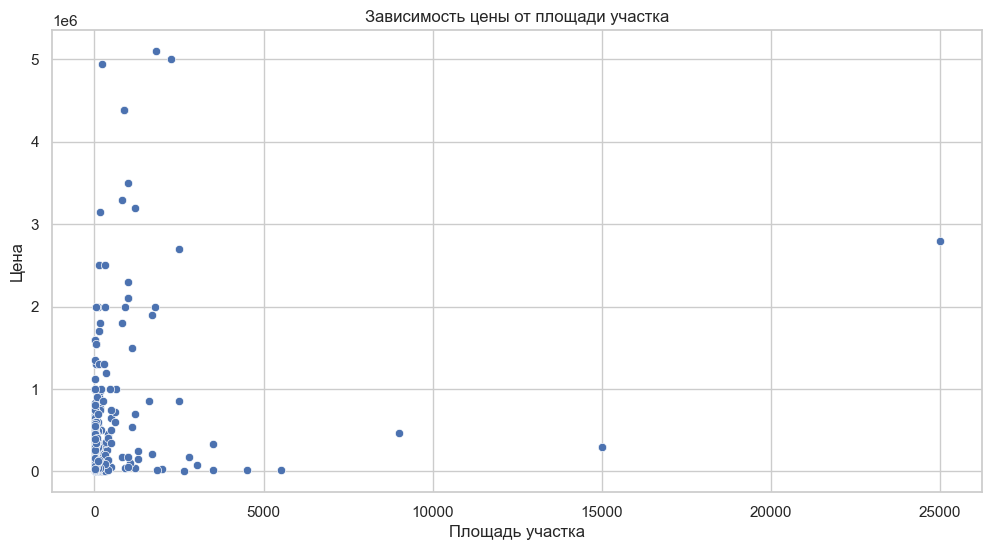

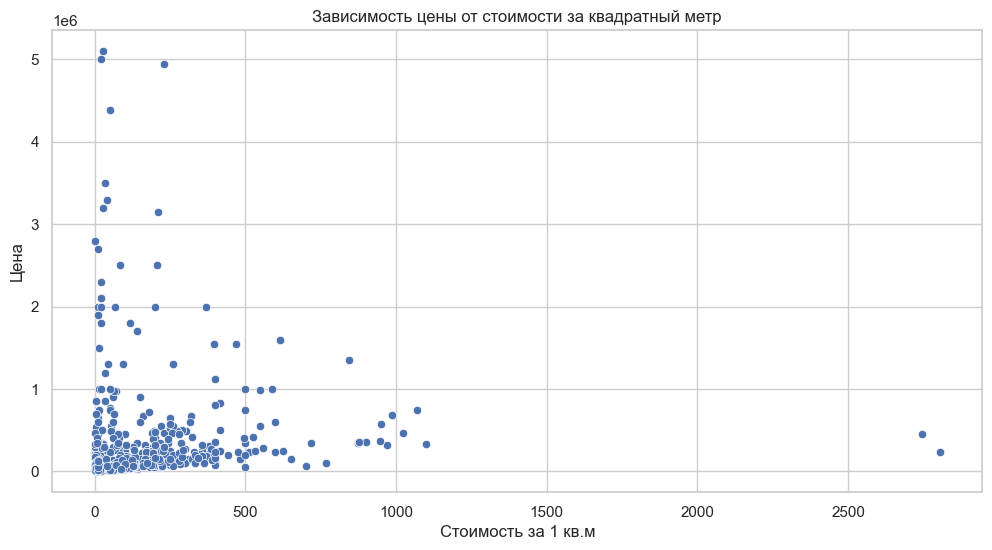

In [9]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Площадь участка', y='Цена', data=data)
plt.title('Зависимость цены от площади участка')
plt.xlabel('Площадь участка')
plt.ylabel('Цена')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Стоимость, доллар США за 1 кв.м', y='Цена', data=data)
plt.title('Зависимость цены от стоимости за квадратный метр')
plt.xlabel('Стоимость за 1 кв.м')
plt.ylabel('Цена')
plt.show()

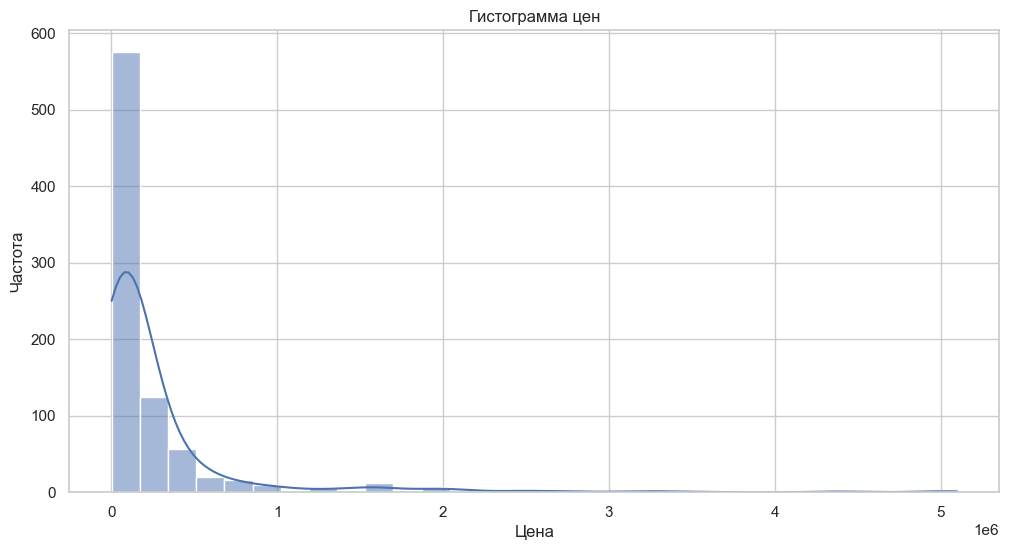

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Цена'], bins=30, kde=True)
plt.title('Гистограмма цен')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()


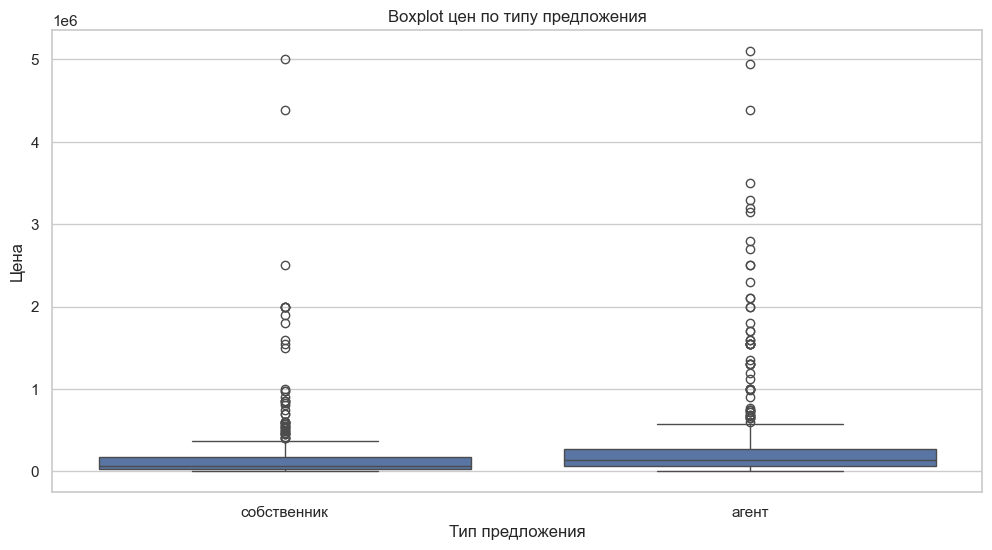

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Тип предложения', y='Цена', data=data)
plt.title('Boxplot цен по типу предложения')
plt.xlabel('Тип предложения')
plt.ylabel('Цена')
plt.show()
#Как мы видим агенты повышают цены.

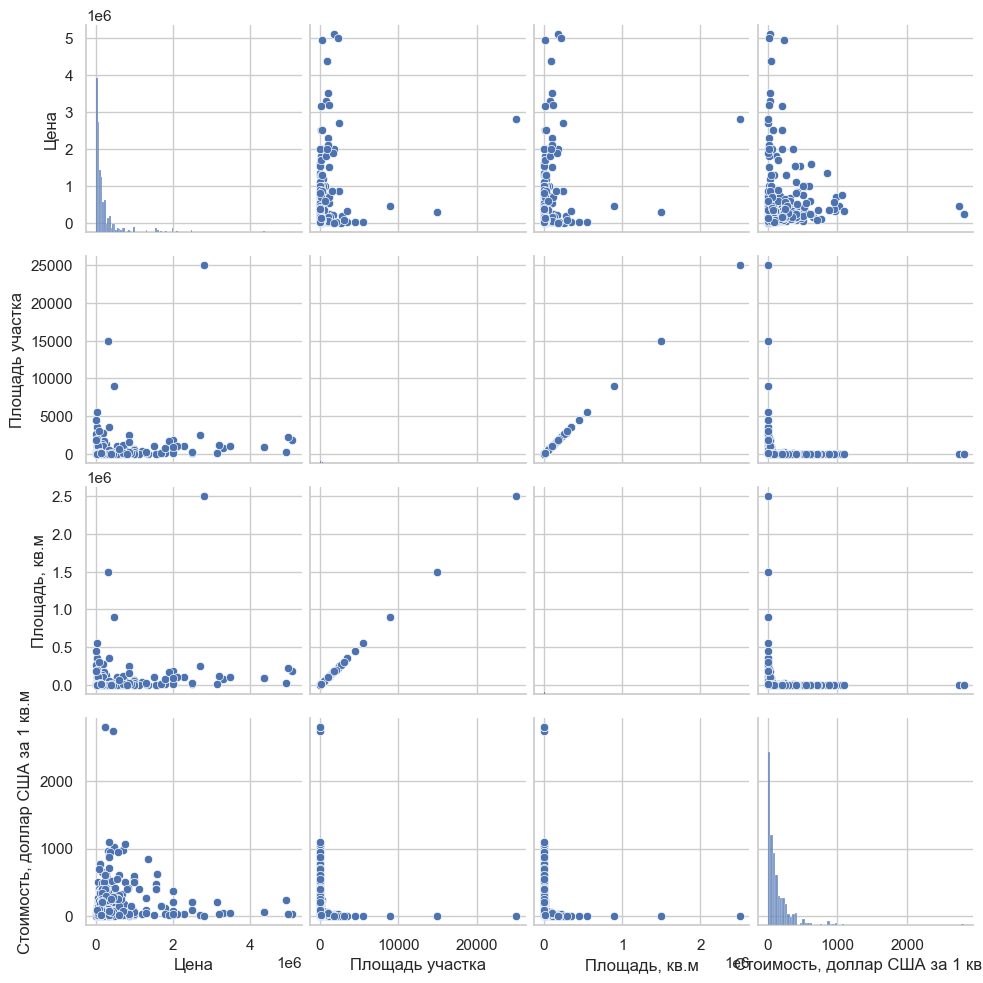

In [12]:
selected_columns = ['Цена', 'Площадь участка', 'Площадь, кв.м', 'Стоимость, доллар США за 1 кв.м']
sns.pairplot(data[selected_columns])
plt.show()


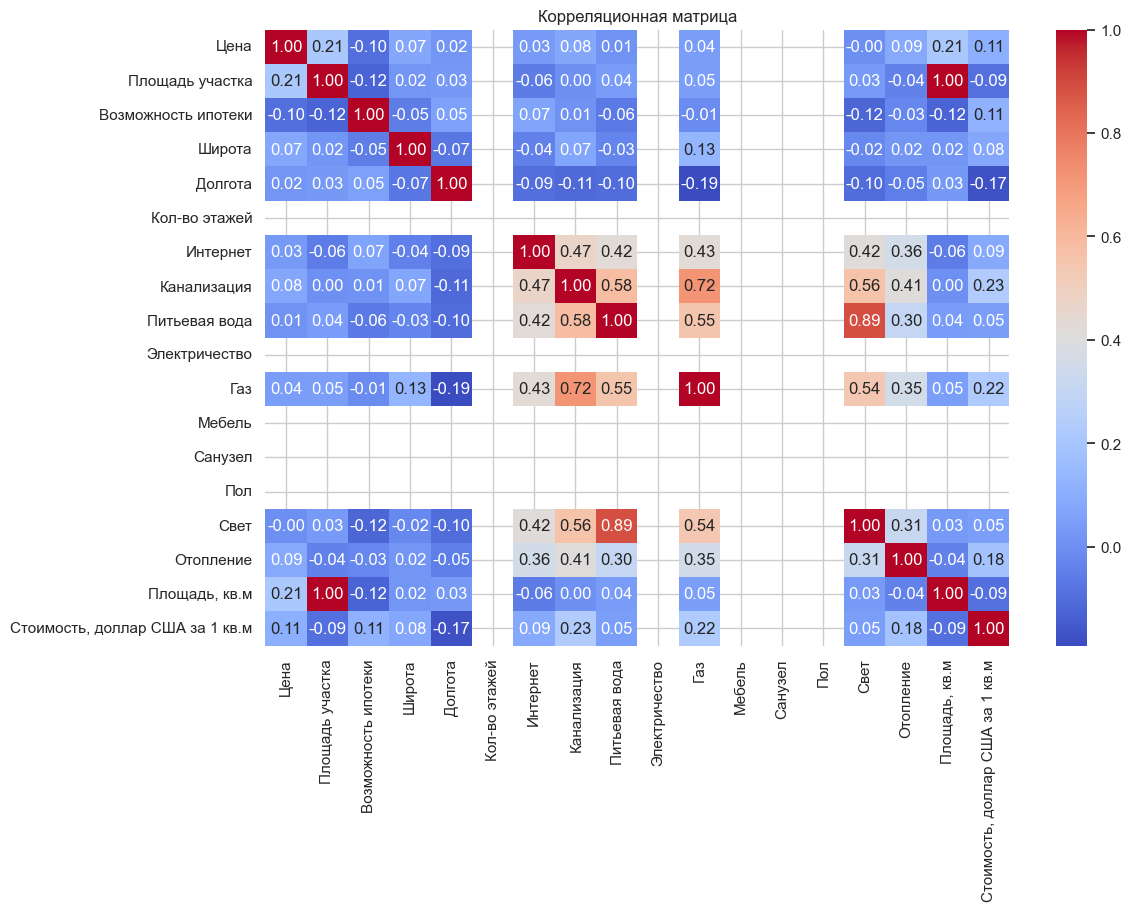

In [15]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()



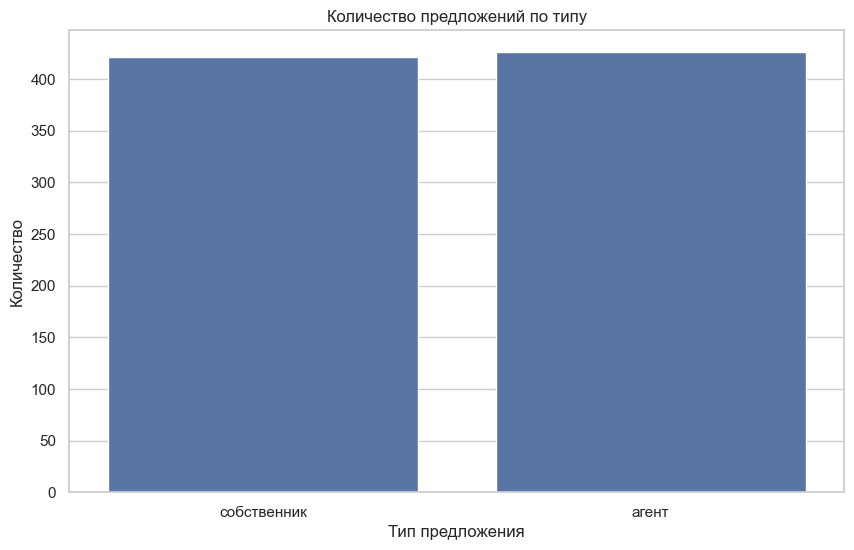

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Тип предложения', data=data)
plt.title('Количество предложений по типу')
plt.xlabel('Тип предложения')
plt.ylabel('Количество')
plt.show()
